## Part I

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# In this question, we defined the particle class, 
# which contains the position, speed and acceleration of the particle. 
# The data type is float.
class Particle:
    def __init__(self, position, velocity):
        self.position = np.array(position, dtype=np.float64)
        self.velocity = np.array(velocity, dtype=np.float64)
        
class Simulation:
    def __init__(self, particles): # Initialize
        self.particles = particles
        # Collect the positions and velocities of all particles into arrays
        self.positions = np.array([p.position for p in particles])
        self.velocities = np.array([p.velocity for p in particles])
        self.accelerations = np.zeros_like(self.positions)
    
    def compute_forces(self):
        
        # Calculate distance matrix and unit vectors vectorized
        r = self.positions[:, np.newaxis, :] - self.positions[np.newaxis, :, :]
        
        # Calculate the magnitude of the displacement vectors
        r_magnitude = np.sqrt(np.sum(r**2, axis=-1))
        r_unit = np.zeros_like(r)  # Initialize a matrix for unit vectors
        
        # Create a mask to avoid division by zero
        # And calculate unit vectors only where the magnitude is not zero
        mask = r_magnitude > 0 
        r_unit[mask] = r[mask] / r_magnitude[mask][..., np.newaxis]

        # Calculate forces using the Lennard-Jones potential
        f = np.zeros_like(r)
        f[mask] = 24 * ((2 / r_magnitude[mask]**13) - (1 / r_magnitude[mask]**7))[:, np.newaxis] * (r_unit[mask])
        
        # Sum up all the forces to get net acceleration on each particle
        # and directly update the acceleration array
        self.accelerations = np.sum(f, axis=1)  
       
    # Verlet integration updates particle positions and velocities
    def verlet_integration(self, dt):
    
        # First, compute the forces acting on all particles based on their current positions
        self.compute_forces()

        # Update velocities by half the increment using the current accelerations
        self.velocities += 0.5 * self.accelerations * dt
    
        # Update positions using the new velocities
        self.positions += self.velocities * dt
    
        # Compute forces again with the new positions to get new accelerations
        self.compute_forces()
    
        # Complete the velocity update with the new accelerations
        self.velocities += 0.5 * self.accelerations * dt
        
        
    # Simulate the particle dynamics over multiple time steps
    def simulate(self, dt, num_steps):

        positions = [] # Initialize 
    
        for step in range(num_steps):
            # Store the current positions of all particles
            positions.append(self.positions.copy())
        
            # Perform one step of Verlet integration with the current time step size
            self.verlet_integration(dt)
    
        return positions
    
    def plot_positions_time(self, dt, num_steps):
        # Run the simulation to get positions data
        positions = self.simulate(dt, num_steps)
        
        # Extract the x positions for Particle 1 and Particle 2
        positions_particle1 = [pos[0][0] for pos in positions]
        positions_particle2 = [pos[1][0] for pos in positions]

        # Create a time array based on the number of steps and time step size
        time = np.arange(num_steps) * dt

        # Plotting the x position over time for each particle
        plt.figure(figsize=(6, 4))
        plt.plot(time, positions_particle1, label='Particle 1', color="red")
        plt.plot(time, positions_particle2, label='Particle 2')

        # Labeling the plot
        plt.xlabel('Time (dimensionless unit)', fontsize=10)
        plt.ylabel('X Position (dimensionless unit)', fontsize=10)
        plt.title('X Position of Particles Over Time', fontsize=10)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()  # Adjust spacing to prevent clipping of labels/titles
        plt.show()
        
    def plot_relative_distance_over_time(self, dt, num_steps):
        # Run the simulation to get positions data
        pos = self.simulate(dt, num_steps)
        positions = np.array(pos)
        
        # Calculate the relative distance between two particles
        relative_distances = np.linalg.norm(positions[:, 0, :] - positions[:, 1, :], axis=1)
        
        # Create a time array based on the number of steps and time step size
        time = np.arange(num_steps) * dt * 10  # Assuming 'dt * 10' is the desired scaling factor for time

        # Plot a graph of relative distance over time
        plt.figure(figsize=(6.5, 4))
        plt.plot(time, relative_distances, label='Relative Distance')
        plt.xlabel('Time (dimensionless unit)')
        plt.ylabel('Relative Distance (dimensionless unit)')
        plt.title('Relative Distance Between Two Particles Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def lj_force(self, r):
        # Lennard-Jones force calculation
        # Assuming epsilon and sigma have been set to 1 for dimensionless units
        epsilon = 1.0
        sigma = 1.0
        return 24 * epsilon * ((2 * (sigma / r)**13) - ((sigma / r)**7))
    
    def plot_force_vs_distance(self, dt, num_steps):
        # Run the simulation to get positions data
        positions = np.array(self.simulate(dt, num_steps))

        # Calculate the distance between two particles over time
        distances = np.linalg.norm(positions[:, 0, :] - positions[:, 1, :], axis=1)
        
        # Calculate the Lennard-Jones force based on the distances
        forces = self.lj_force(distances)

        # Plot the relationship between force and distance
        plt.figure(figsize=(6.5, 4))
        plt.plot(distances, forces, label='Force vs Distance')
        plt.xlabel('Distance (dimensionless unit)')
        plt.ylabel('Force (dimensionless unit)')
        plt.title('Lennard-Jones Force vs. Distance')
        plt.grid(True)
        plt.legend()
        plt.show()

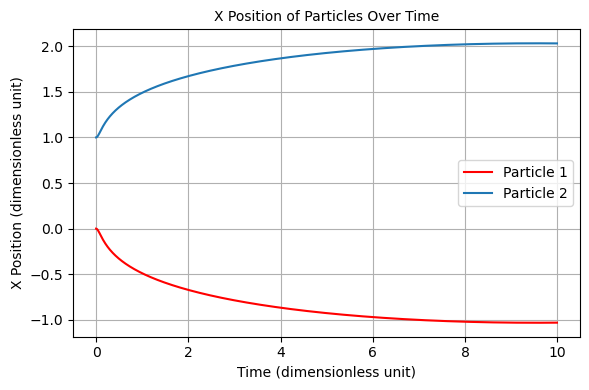

In [2]:
## Condition 1
particle1 = Particle(np.array([0, 0, 0]), np.array([0, 0, 0]))
particle2 = Particle(np.array([1, 0, 0]), np.array([0, 0, 0]))
particles = [particle1, particle2]

simulation = Simulation(particles)

dt = 0.01
num_steps = 1000
simulation.plot_positions_time(dt, num_steps)

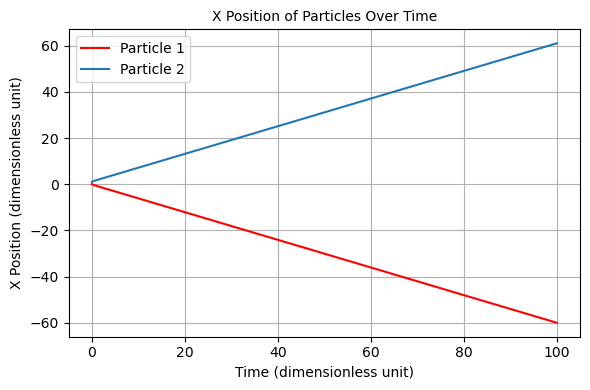

In [3]:
# Condition 2
particle1 = Particle(np.array([0, 0, 0]), np.array([0, 0, 0]))
particle2 = Particle(np.array([1, 0, 0]), np.array([0, 0, 0]))
particles = [particle1, particle2]

simulation = Simulation(particles)

dt = 0.1
num_steps = 1000
simulation.plot_positions_time(dt, num_steps)

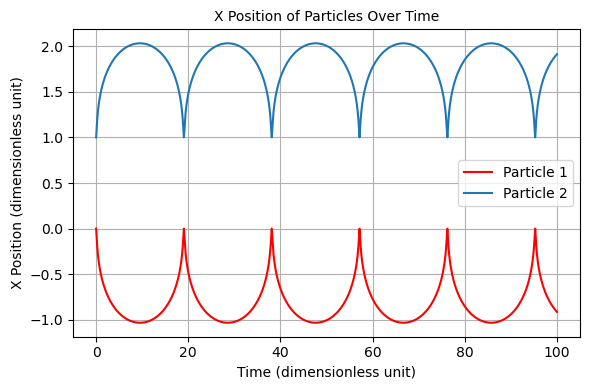

In [4]:
## Condition 3
particle1 = Particle(np.array([0, 0, 0]), np.array([0, 0, 0]))
particle2 = Particle(np.array([1, 0, 0]), np.array([0, 0, 0]))
particles = [particle1, particle2]

simulation = Simulation(particles)

dt = 0.01
num_steps = 10000
simulation.plot_positions_time(dt, num_steps)

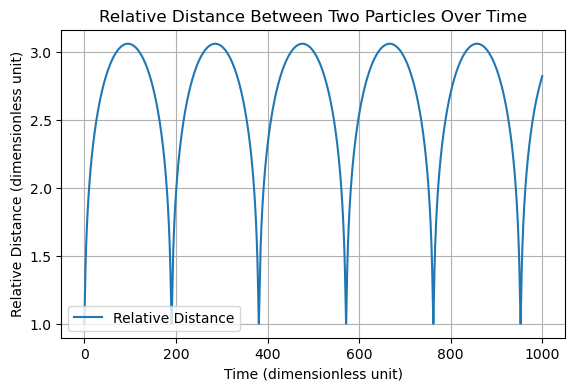

In [5]:
## Condition 3 --- Relative distance
particle1 = Particle(np.array([0, 0, 0]), np.array([0, 0, 0]))
particle2 = Particle(np.array([1, 0, 0]), np.array([0, 0, 0]))
particles = [particle1, particle2]

simulation = Simulation(particles)

dt = 0.01
num_steps = 10000
simulation.plot_relative_distance_over_time(dt, num_steps)

In [6]:
# Find the balance point between two particle
def lj_force(r):
    # Compute the derivative of Lennard-Jones potential to get the force.
    return 24  * ((2 * (1 / r)**13) - (1 / r)**7)

def find_equilibrium_position( initial_guess=1.0, tol=1e-10, max_iter=1000):
    # Use Newton's method to find the root of the Lennard-Jones force equation.
    r = initial_guess
    for _ in range(max_iter):
        force = lj_force(r)
        # Derivative of the force w.r.t. r
        derivative = -24  * ((26 * (1 / r)**14) - (7 * (1 / r)**8))
        # Newton's method update
        r_next = r - force / derivative
        # Check for convergence
        if abs(r_next - r) < tol:
            print("Newton's method already converge")
            return r_next
        r = r_next
    raise RuntimeError("Newton's method did not converge")

# Using the function to find the equilibrium position 2**(1/6)
equilibrium_position = find_equilibrium_position(initial_guess=1.0)
print(f"Equilibrium position: {equilibrium_position:.4f}")

Newton's method already converge
Equilibrium position: 1.1225


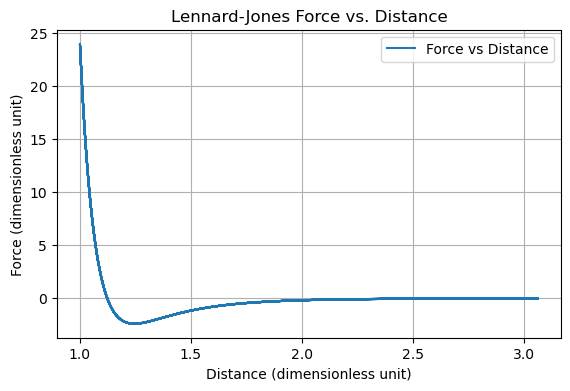

In [7]:
simulation.plot_force_vs_distance(dt, num_steps)

## Part â…¡

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# In this question, we defined the particle class, 
# which contains the position, speed and acceleration of the particle. 
# The data type is float.
class Particle:
    def __init__(self, position, velocity):
        self.position = np.array(position, dtype=np.float64)
        self.velocity = np.array(velocity, dtype=np.float64)
        
class Simulation:
    def __init__(self, particles,box_size): # Initialize
        self.particles = particles
        # Collect the positions and velocities of all particles into arrays
        self.positions = np.array([p.position for p in particles])
        self.velocities = np.array([p.velocity for p in particles])
        self.accelerations = np.zeros_like(self.positions)
        self.box_size = box_size
    
    def compute_forces(self):
        
        # Calculate distance matrix and unit vectors vectorized
        r = self.positions[:, np.newaxis, :] - self.positions[np.newaxis, :, :]
        
        # Calculate the magnitude of the displacement vectors
        r_magnitude = np.sqrt(np.sum(r**2, axis=-1))
        r_unit = np.zeros_like(r)  # Initialize a matrix for unit vectors
        
        # Create a mask to avoid division by zero
        # And calculate unit vectors only where the magnitude is not zero
        mask = r_magnitude > 0 
        r_unit[mask] = r[mask] / r_magnitude[mask][..., np.newaxis]

        # Calculate forces using the Lennard-Jones potential
        f = np.zeros_like(r)
        f[mask] = 24 * ((2 / r_magnitude[mask]**13) - (1 / r_magnitude[mask]**7))[:, np.newaxis] * (r_unit[mask])
        
        # Sum up all the forces to get net acceleration on each particle
        # and directly update the acceleration array
        self.accelerations = np.sum(f, axis=1)  
       
    # Verlet integration updates particle positions and velocities
    def verlet_integration(self, dt):
        # First, compute the forces acting on all particles based on their current positions
        self.compute_forces()

        # Update velocities by half the increment using the current accelerations
        self.velocities += 0.5 * self.accelerations * dt

        # Update positions using the new velocities
        self.positions += self.velocities * dt

        # Check for collisions with the walls of the box and handle them
        for dim in range(3):  # Check each dimension (x, y, z)
            # Particles hitting the positive boundary
            over = self.positions[:, dim] > self.box_size / 2
            self.velocities[over, dim] *= -1  # Reverse the velocity
            self.positions[over, dim] = self.box_size / 2 - (self.positions[over, dim] - self.box_size / 2)

            # Particles hitting the negative boundary
            under = self.positions[:, dim] < -self.box_size / 2
            self.velocities[under, dim] *= -1  # Reverse the velocity
            self.positions[under, dim] = -self.box_size / 2 - (self.positions[under, dim] + self.box_size / 2)

        # Compute forces again with the new positions to get new accelerations
        self.compute_forces()

        # Complete the velocity update with the new accelerations
        self.velocities += 0.5 * self.accelerations * dt

    # Simulate the particle dynamics over multiple time steps
    def simulate(self, dt, num_steps):

        positions = [] # Initialize 
    
        for step in range(num_steps):
            # Store the current positions of all particles
            positions.append(self.positions.copy())
        
            # Perform one step of Verlet integration with the current time step size
            self.verlet_integration(dt)
    
        return positions
    
    def plot_3d_trajectory(self, dt, num_steps, box_size):
        # Run the simulation to get positions data
        positions = self.simulate(dt, num_steps)

        # Create initial figure
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Draw the box frame
        box_coords = np.array([[-box_size / 2, -box_size / 2, -box_size / 2],
                               [-box_size / 2, box_size / 2, -box_size / 2],
                               [box_size / 2, box_size / 2, -box_size / 2],
                               [box_size / 2, -box_size / 2, -box_size / 2],
                               [-box_size / 2, -box_size / 2, box_size / 2],
                               [-box_size / 2, box_size / 2, box_size / 2],
                               [box_size / 2, box_size / 2, box_size / 2],
                               [box_size / 2, -box_size / 2, box_size / 2]])
        box_edges = [[0, 1, 2, 3, 0], [4, 5, 6, 7, 4], [0, 4], [1, 5], [2, 6], [3, 7]]
        for edge in box_edges:
            ax.plot(box_coords[edge, 0], box_coords[edge, 1], box_coords[edge, 2], c='black', lw=1.5)

        # Plot particle trajectories
        particle1_positions = np.array([pos[0] for pos in positions])
        particle2_positions = np.array([pos[1] for pos in positions])

        ax.plot(particle1_positions[:, 0], particle1_positions[:, 1], particle1_positions[:, 2], c='blue', label='Particle 1')
        ax.plot(particle2_positions[:, 0], particle2_positions[:, 1], particle2_positions[:, 2], c='yellow', label='Particle 2')

        # Set the axis limits
        ax.set_xlim(-box_size / 2, box_size / 2)
        ax.set_ylim(-box_size / 2, box_size / 2)
        ax.set_zlim(-box_size / 2, box_size / 2)

        # Set the axis labels
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        # Add legend
        ax.legend()
    
        # Set the title
        plt.title('The trajectory of particles in 3D')

        # Display the plot
        plt.show()
        
    def plot_positions_time(self, dt, num_steps):
        # Run the simulation to get positions data
        positions = self.simulate(dt, num_steps)
        
        # Extract the x positions for Particle 1 and Particle 2
        positions_particle1 = [pos[0][0] for pos in positions]
        positions_particle2 = [pos[1][0] for pos in positions]

        # Create a time array based on the number of steps and time step size
        time = np.arange(num_steps) * dt

        # Plotting the x position over time for each particle
        plt.figure(figsize=(6, 4))
        plt.plot(time, positions_particle1, label='Particle 1', color="red")
        plt.plot(time, positions_particle2, label='Particle 2')

        # Labeling the plot
        plt.xlabel('Time (dimensionless unit)', fontsize=10)
        plt.ylabel('X Position (dimensionless unit)', fontsize=10)
        plt.title('X Position of Particles Over Time', fontsize=10)
        plt.axhline(y=box_size/2, color='r', linestyle='--', label='Box Wall')
        plt.axhline(y=-box_size/2, color='r', linestyle='--')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()  # Adjust spacing to prevent clipping of labels/titles
        plt.show()

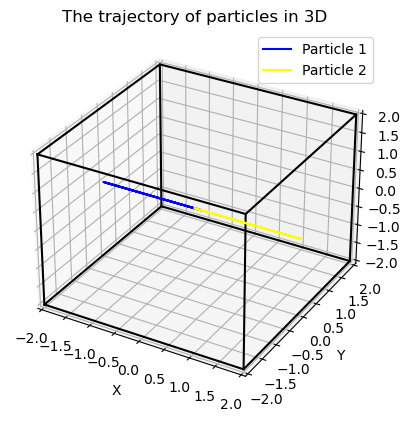

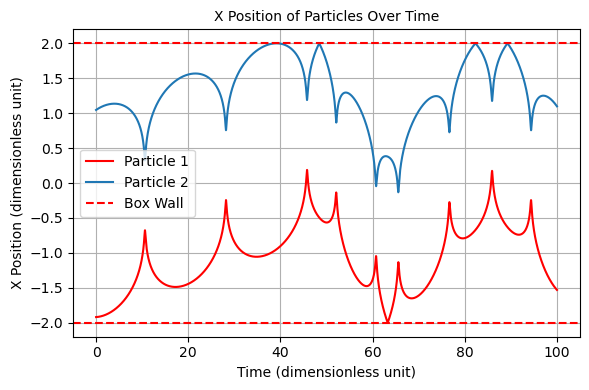

In [9]:
# condition 1 
particle1 = Particle(np.array([0, 0, 0]), np.array([0, 0, 0]))
particle2 = Particle(np.array([1, 0, 0]), np.array([0, 0, 0]))
particles = [particle1, particle2]
dt = 0.01
num_steps = 10000
box_size = 4.0  

simulation = Simulation(particles, box_size)
simulation.plot_3d_trajectory(dt,num_steps,box_size)
simulation.plot_positions_time(dt,num_steps)

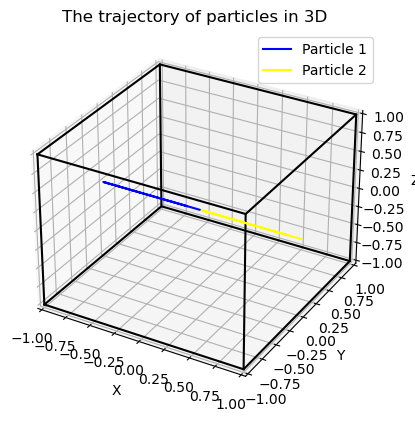

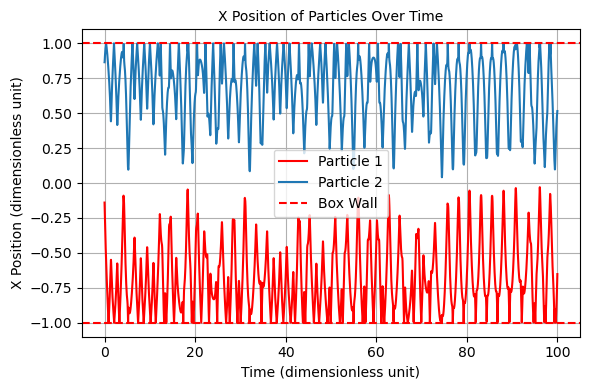

In [10]:
# condition 2
particle1 = Particle(np.array([0, 0, 0]), np.array([0, 0, 0]))
particle2 = Particle(np.array([1, 0, 0]), np.array([0, 0, 0]))
particles = [particle1, particle2]
dt = 0.01
num_steps = 10000
box_size = 2.0  

simulation = Simulation(particles, box_size)
simulation.plot_3d_trajectory(dt,num_steps,box_size)
simulation.plot_positions_time(dt,num_steps)

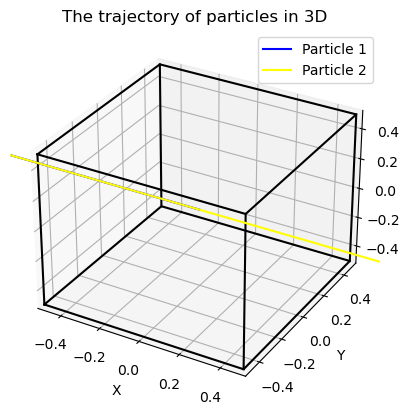

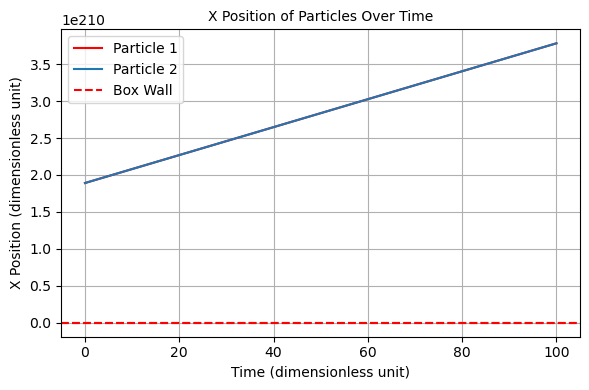

In [11]:
# condition 3
particle1 = Particle(np.array([0, 0, 0]), np.array([0, 0, 0]))
particle2 = Particle(np.array([1, 0, 0]), np.array([0, 0, 0]))
particles = [particle1, particle2]
dt = 0.01
num_steps = 10000
box_size = 1.0  

simulation = Simulation(particles, box_size)
simulation.plot_3d_trajectory(dt,num_steps,box_size)
simulation.plot_positions_time(dt,num_steps)

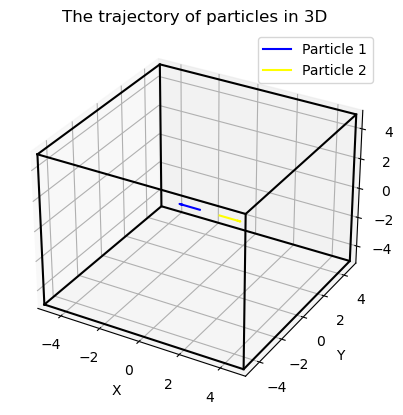

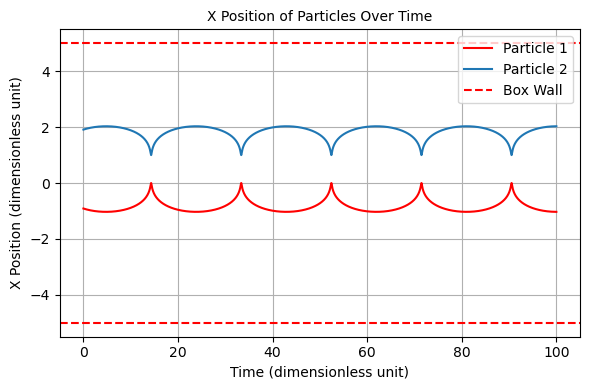

In [12]:
# condition 4
particle1 = Particle(np.array([0, 0, 0]), np.array([0, 0, 0]))
particle2 = Particle(np.array([1, 0, 0]), np.array([0, 0, 0]))
particles = [particle1, particle2]
dt = 0.01
num_steps = 10000
box_size = 10

simulation = Simulation(particles, box_size)
simulation.plot_3d_trajectory(dt,num_steps,box_size)
simulation.plot_positions_time(dt,num_steps)

## Part 3

In [13]:
# In this question, we defined the particle class, 
# which contains the position, speed and acceleration of the particle. 
# The data type is float.
class Particle:
    def __init__(self, position, velocity):
        self.position = np.array(position, dtype=np.float64)
        self.velocity = np.array(velocity, dtype=np.float64)
        
class Simulation:
    def __init__(self, particles,box_size): # Initialize
        self.particles = particles
        # Collect the positions and velocities of all particles into arrays
        self.positions = np.array([p.position for p in particles])
        self.velocities = np.array([p.velocity for p in particles])
        self.accelerations = np.zeros_like(self.positions)
        self.box_size = box_size
        self.pressures = []
        self.temperatures = []
        
    def compute_forces(self):
        
        # Calculate distance matrix and unit vectors vectorized
        r = self.positions[:, np.newaxis, :] - self.positions[np.newaxis, :, :]
        
        # Calculate the magnitude of the displacement vectors
        r_magnitude = np.sqrt(np.sum(r**2, axis=-1)).astype(np.float128)
        r_unit = np.zeros_like(r)  # Initialize a matrix for unit vectors
        
        # Create a mask to avoid division by zero
        # And calculate unit vectors only where the magnitude is not zero
        mask = r_magnitude > 0 
        r_unit[mask] = r[mask] / r_magnitude[mask][..., np.newaxis]

        # Calculate forces using the Lennard-Jones potential
        f = np.zeros_like(r)
        f[mask] = 24 * ((2 / r_magnitude[mask]**13) - (1 / r_magnitude[mask]**7))[:, np.newaxis] * (r_unit[mask])
        
        # Sum up all the forces to get net acceleration on each particle
        # and directly update the acceleration array
        self.accelerations = np.sum(f, axis=1)  

    # Verlet integration updates particle positions and velocities
    def verlet_integration(self, dt):
        # Compute the forces acting on all particles based on their current positions
        self.compute_forces()

        # Update velocities by half the increment using the current accelerations
        self.velocities += 0.5 * self.accelerations * dt
    
        # Update positions using the new velocities
        self.positions += self.velocities * dt
    
        # Handle collisions with the walls of the box
        # Check for particles exceeding the boundaries in either direction for all dimensions
        over = self.positions > self.box_size / 2
        under = self.positions < -self.box_size / 2

        # Reverse velocities where particles have hit the walls
        self.velocities[over] *= -1
        self.velocities[under] *= -1

        # Correct positions where particles have exceeded the box
        # Particles that have moved beyond the positive boundary
        self.positions[over] = self.box_size - (self.positions[over] - self.box_size / 2)
        # Particles that have moved beyond the negative boundary
        self.positions[under] = -self.box_size - (self.positions[under] + self.box_size / 2)


        # Compute forces again with the new positions to get new accelerations
        self.compute_forces()

        # Complete the velocity update with the new accelerations
        self.velocities += 0.5 * self.accelerations * dt

    # Simulate the particle dynamics over multiple time steps
    def simulate(self, dt, num_steps, log_interval=100):
        for step in range(num_steps):
            self.verlet_integration(dt)

            # Log data at intervals
            if step % log_interval == 0:
                current_pressure = self.calculate_pressure(dt)
                current_temperature = self.calculate_temperature()
    
                self.pressures.append(current_pressure)
                self.temperatures.append(current_temperature)

    # computer temperature
    def calculate_temperature(self):
        total_kinetic_energy = 0.5 * np.sum(self.velocities**2)
        # Assuming unit mass and Boltzmann constant (kB) = 1 for simplicity
        temperature = (2 / 3) * total_kinetic_energy / len(self.particles)
        return temperature
    
    # computer pressure
    def calculate_pressure(self, dt):
        area = self.box_size**2  # Assuming a cubic box and area of one side
        momentum_transfer = 0

        # Calculate the absolute change in position for all particles and dimensions
        boundary_hits = np.abs(self.positions) >= self.box_size / 2

        # If a particle hits the boundary, its velocity in that dimension is reversed,
        # which means the momentum changes by twice the velocity component in that dimension.
        # Calculate total momentum transfer considering the impulse on boundaries.
        momentum_transfer = 2 * np.sum(np.abs(self.velocities[boundary_hits]))

        # Calculate pressure using the momentum transfer formula
        pressure = momentum_transfer / (area * dt)
        return pressure


In [14]:

from datetime import datetime
from sklearn.metrics import r2_score

# Randomly generate particles
def generate_particles(n_particles, box_size):
    np.random.seed(3)
    particles = []
    # Generate random positions
    positions = np.random.uniform(low=-box_size/2, high=box_size/2, size=(n_particles, 3))
    
    velocities = np.zeros((n_particles, 3))
    for position, velocity in zip(positions, velocities):
        particles.append(Particle(position, velocity))
    return particles

In [15]:
### Condition 1

n_particles = 50
box_sizes = np.linspace(2,4,5) # Volume
dt = 0.01
num_steps = 3000

temperatures = [] # to store temperature
pressures = [] # to store pressure

start_time = datetime.now() # Start time

# Compute the pressure in different volume
for box_size in box_sizes:
    particles = generate_particles(n_particles, box_size)
    sim = Simulation(particles, box_size)
    sim.simulate(dt, num_steps)
    temperatures.append(np.mean(sim.temperatures))
    pressures.append(np.mean(sim.pressures))

volumes = np.array(box_sizes) ** 3
temperatures = np.array(temperatures)
pressures = np.array(pressures)

end_time = datetime.now() # End time

print(f"Number of particles: {n_particles}")
print(f"Time step (dt): {dt}")
print(f"Number of steps (num_steps): {num_steps}")
print(f"The simulation time :{end_time-start_time}")

Number of particles: 50
Time step (dt): 0.01
Number of steps (num_steps): 3000
The simulation time :0:01:05.350215


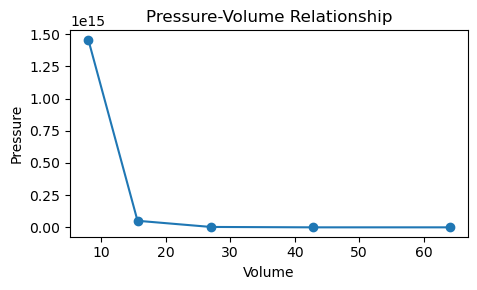

In [16]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(volumes, pressures, '-o')
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.title('Pressure-Volume Relationship')

# plt.yscale('log')
# plt.xscale('log')

plt.tight_layout()
plt.show()

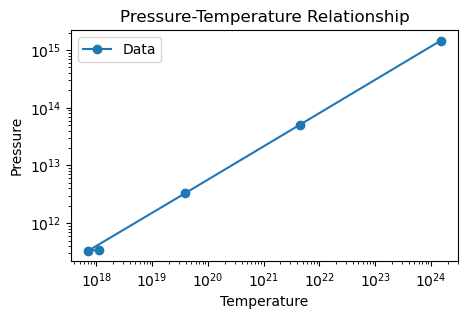

In [17]:
plt.figure(figsize=(11, 3))
plt.subplot(1, 2, 2)
plt.plot(temperatures, pressures, '-o', label='Data')
# plt.plot(temperatures, trendline, color='red', label='Trendline')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.yscale('log')
plt.xscale('log')
plt.title('Pressure-Temperature Relationship')
plt.legend()
plt.show()

In [18]:
### Condition 2

n_particles = 50
box_sizes = np.linspace(2,4,10) # Volume
dt = 0.01
num_steps = 1000

temperatures = [] # to store temperature
pressures = [] # to store pressure

start_time = datetime.now() # Start time

# Compute the pressure in different volume
for box_size in box_sizes:
    particles = generate_particles(n_particles, box_size)
    sim = Simulation(particles, box_size)
    sim.simulate(dt, num_steps)
    temperatures.append(np.mean(sim.temperatures))
    pressures.append(np.mean(sim.pressures))

volumes = np.array(box_sizes) ** 3
temperatures = np.array(temperatures)
pressures = np.array(pressures)

end_time = datetime.now() # End time

print(f"Number of particles: {n_particles}")
print(f"Time step (dt): {dt}")
print(f"Number of steps (num_steps): {num_steps}")
print(f"The simulation time :{end_time-start_time}")

Number of particles: 50
Time step (dt): 0.01
Number of steps (num_steps): 1000
The simulation time :0:00:43.153825


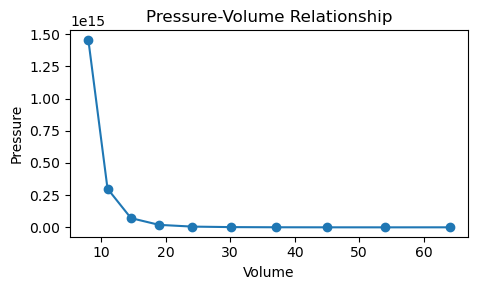

In [19]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(volumes, pressures, '-o')
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.title('Pressure-Volume Relationship')

# plt.yscale('log')
# plt.xscale('log')

plt.tight_layout()
plt.show()

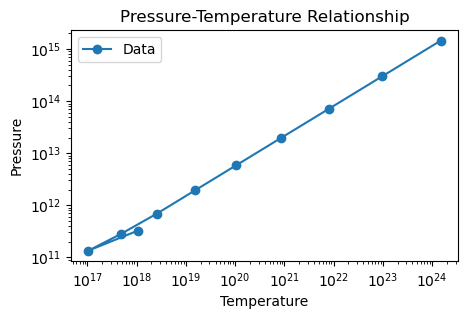

In [20]:
plt.figure(figsize=(11, 3))
plt.subplot(1, 2, 2)
plt.plot(temperatures, pressures, '-o', label='Data')
# plt.plot(temperatures, trendline, color='red', label='Trendline')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.yscale('log')
plt.xscale('log')
plt.title('Pressure-Temperature Relationship')
plt.legend()
plt.show()

In [21]:
####  Condition 3

n_particles = 50
box_sizes = np.linspace(1,10,5) # Volume
dt = 0.01
num_steps = 3000

temperatures = [] # to store temperature
pressures = [] # to store pressure

start_time = datetime.now() # Start time

# Compute the pressure in different volume
for box_size in box_sizes:
    particles = generate_particles(n_particles, box_size)
    sim = Simulation(particles, box_size)
    sim.simulate(dt, num_steps)
    temperatures.append(np.mean(sim.temperatures))
    pressures.append(np.mean(sim.pressures))

volumes = np.array(box_sizes) ** 3
temperatures = np.array(temperatures)
pressures = np.array(pressures)

end_time = datetime.now() # End time

print(f"Number of particles: {n_particles}")
print(f"Time step (dt): {dt}")
print(f"Number of steps (num_steps): {num_steps}")
print(f"The simulation time :{end_time-start_time}")

Number of particles: 50
Time step (dt): 0.01
Number of steps (num_steps): 3000
The simulation time :0:01:04.974360


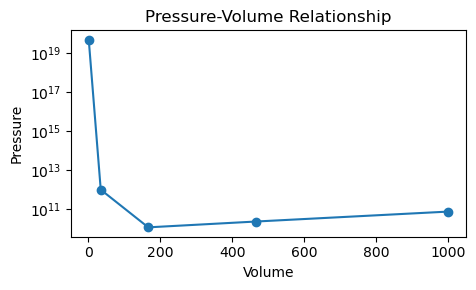

In [22]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(volumes, pressures, '-o')
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.title('Pressure-Volume Relationship')

plt.yscale('log')
# plt.xscale('log')

plt.tight_layout()
plt.show()

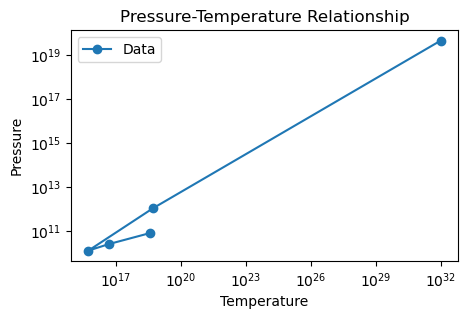

In [23]:
plt.figure(figsize=(11, 3))
plt.subplot(1, 2, 2)
plt.plot(temperatures, pressures, '-o', label='Data')
# plt.plot(temperatures, trendline, color='red', label='Trendline')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.yscale('log')
plt.xscale('log')
plt.title('Pressure-Temperature Relationship')
plt.legend()
plt.show()

In [24]:
####  Condition 4

n_particles = 50
box_sizes = np.linspace(1,10,10) # Volume
dt = 0.01
num_steps = 1000

temperatures = [] # to store temperature
pressures = [] # to store pressure

start_time = datetime.now() # Start time

# Compute the pressure in different volume
for box_size in box_sizes:
    particles = generate_particles(n_particles, box_size)
    sim = Simulation(particles, box_size)
    sim.simulate(dt, num_steps)
    temperatures.append(np.mean(sim.temperatures))
    pressures.append(np.mean(sim.pressures))

volumes = np.array(box_sizes) ** 3
temperatures = np.array(temperatures)
pressures = np.array(pressures)

end_time = datetime.now() # End time

print(f"Number of particles: {n_particles}")
print(f"Time step (dt): {dt}")
print(f"Number of steps (num_steps): {num_steps}")
print(f"The simulation time :{end_time-start_time}")

Number of particles: 50
Time step (dt): 0.01
Number of steps (num_steps): 1000
The simulation time :0:00:42.833576


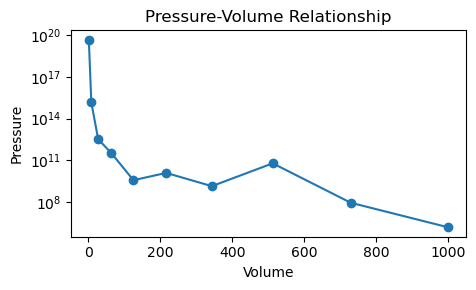

In [25]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(volumes, pressures, '-o')
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.title('Pressure-Volume Relationship')

plt.yscale('log')
# plt.xscale('log')

plt.tight_layout()
plt.show()

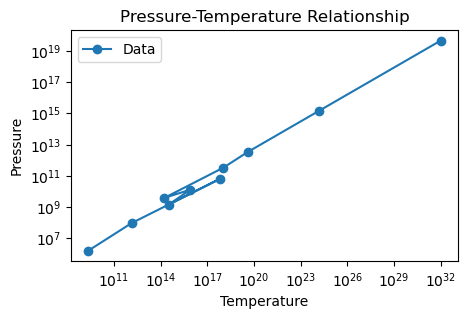

In [26]:
plt.figure(figsize=(11, 3))
plt.subplot(1, 2, 2)
plt.plot(temperatures, pressures, '-o', label='Data')
# plt.plot(temperatures, trendline, color='red', label='Trendline')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.yscale('log')
plt.xscale('log')
plt.title('Pressure-Temperature Relationship')
plt.legend()
plt.show()